<a href="https://colab.research.google.com/github/mariahelenass/MLflow/blob/main/MLflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [3]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=1a5acff4c05a62639da3f7c1b54e5dce4071b49189cfc7e6d7a0074421124baa
  Stored in directory: /root/.cache/pip/wheels

In [4]:
import mlflow
import mlflow.tensorflow

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '5')

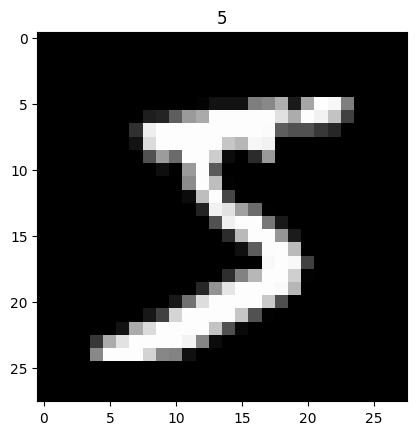

In [12]:
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0])

In [14]:
# Redimensionando a matriz
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [15]:
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [16]:
# Transformando para float
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Normalizando
X_train /= 255 # dividindo pelo valor mais alto que existe em um pixel
X_test /= 255 

In [18]:
y_train[0]

5

In [20]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
from sklearn import metrics
def treina_modelo(n_camadas_ocultas, neuronios, activation, dropout, epochs):
  mlflow.set_experiment("DlExperimento")

  with mlflow.start_run():

    modelo = Sequential()

    # Criando camada oculta e camada de entrada
    modelo.add(Dense(units=neuronios, activation=activation, input_dim=784))

    '''
    O dropout é uma técnica utilizada em redes neurais para reduzir o overfitting, 
    desativando aleatoriamente uma porcentagem de neurônios durante o treinamento
    '''

    modelo.add(Dropout(dropout))

    # Criando camadas ocultas adicionais com dropout
    for i in range(n_camadas_ocultas):
       modelo.add(Dense(units=neuronios, activation=activation))
       modelo.add(Dropout(dropout))

    # Criando camada de saída
    modelo.add(Dense(units=10, activation="softmax"))

    # Compilando o modelo
    modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

    # Sumário da arquitetura do modelo
    modelo.summary()

    # Treinamento do modelo
    historico = modelo.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

    # Gerando gráficos para os erros e acurácia
    historico.history.keys()
    loss = plt.plot(historico.history['val_loss'])
    plt.savefig('loss.png')
    acuracia = plt.plot(historico.history['val_accuracy'])
    plt.savefig('acuracia.png')

    # Registrando artefatos
    mlflow.log_artifact("loss.png")
    mlflow.log_artifact("acuracia.png")

    # Informações de execução 
    print("Modelo: ", mlflow.active_run().info.run_uuid)  

  mlflow.end_run()

In [ ]:
# Criando modelos com diversos parâmetros

n_camadas_ocultas = [1,2,3]
neuronios = [16,32,64]
activation = ['relu','tanh']
dropout = [0.1, 0.2]
epochs = [5,10,20]

for camadas in n_camadas_ocultas:
  for neuronio in neuronios:
    for ativacao in activation:
      for drop in dropout:
        for epocas in epochs:
           treina_modelo(camadas, neuronio, ativacao, drop, epocas)